 <h1> ADRIÁN HERNÁNDEZ PADRÓN</h1>

$Resolución$ $de$ $problemas$ $de$ $valores$ $en$ $la$ $frontera$

Vamos a resolver el problema de valores en la frontera utilizando el método de disparo.

Para ello resolveremos la siguiente ecuación:

<center>$ y''(x)=f(x,y',y)$

Que se encuentra sujeta a unas condiciones iniciales(de frontera):

$y(a)=y_a$

$y(b)=y_b$

$y'(a)=s$

Siendo s un valor desconocido. Buscaremos el valor de s que satisface la siguiente ecuación:

<center>$Y(b,s)-y_b=0$

El problema que vamos a resolver se trata del propuesto en el campus virtual: Una barra de sección pequeña unida en sus extremos a dos fuentes de temperatura constante y sin estar aislada del aire

Usando la Primera Ley de Fourier para la conducción de calor en el interior de la barra y la Ley de Newton para la transferencia de calor mediante convección, podemos llegar a la siguiente expresión, que permite obtener la distribución de la temperatura a lo largo de la barra:

<center>$T''(x)-\dfrac {h·P}{k·A} \cdot(T-T_a)=0$

En donde:



$P$ es el perímetro 

$A$ la sección transversal de la misma

$T_a$ la temperatura del aire que rodea la barra

$k$ es la conductividad térmica del material (en nuestro caso hierro dulce)

$h$ es el coeficiente de transferencia de calor convectiva

Las condiciones de contorno del problema son:

<center>$T(0)=T_h$

<center>$T(L)=T_c$




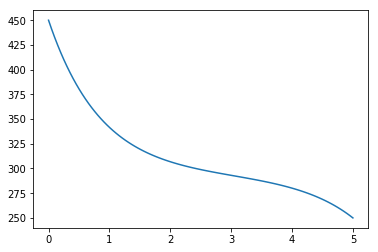

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*

#Temperaturas que intervienen en el proceso
Ta=273.15+20 
Th=450
Tc=250

#Introducimos los datos de la barra y en entorno 
R=0.5 
L=5
P=2*(L+2*pi*R) 
A=pi*(R**2.) 
k=79.5
h=5

x=linspace(0,L,100) #Array donde dividimos la longitud de la barra

def f(Tx):#Definimos la ecuación del calor
    f=((h*P)/(k*A))*(Tx-Ta)
    return f

#Creamos los arrays vacíos donde introduciremos los valores de ambos valores
#Los creamos de manera que tengan la forma de una matriz del ((tamaño de x)x2) para poder introducir ambas valores de las derivadas en un mismo array
D = np.zeros(2*len(x)).reshape(len(x),2)
T1 = np.zeros(2*len(x)).reshape(len(x),2)
H = L/len(x) #El tamaño de cada paso
D[0]= 3, 10 #Introducimos los valores arbitrarios escogidos para las primeras derivadas
T1[0] = Th, Th #Introducimos la temperatura inicial

#Realizamos el metodo de euler con el cual obtendremos los valores de T1(L) que son los que usaremos para el ajuste 
for i in range(0, len (x)-1):
    T1[i+1] = T1[i] + H*D[i]
    D[i+1] = D[i] + H*f(T1[i])
    
#Usamos polyfit para ajustar a un polinomio de grado uno 
#Ajusteremos los valores de las primeras derivadas en x=0 frente a las temperaturas obtenidas en x=L
s = polyval(polyfit(T1[-1], D[0],1),Tc) #Obtenemos el valor de la primera derivada

#Realizamos de nuevo el método de euler con el valor de la primera derivada obtenido(s)
S = np.zeros(len(x))
T = np.zeros(len(x))
S[0] = s
T[0] = Th
for j in range(0, len (x)-1):
    S[j+1] = S[j] + H*f(T[j])
    T[j+1] = T[j] + H*S[j]
#Con esto obtenemos el arrays de temperatura en la barra

    
#graficamos
plt.plot(x, T , label='$y(t)$')


Una vez definidas todas las constantes y la ecuación del calor, simplemente aplicamos el método de euler a los valores arbitrarios que seleccionamos y realizamos el ajuste con estos valores y los correspondientes a T2(L) para obtener así el valor inicial de la derivada. 

Con este valor aplicamos euler de nuevo y obtenemos el valor de la temperatura a lo largo de la barra.
Se puede que el resultado es el mismo independientemente de los valores inicales seleccionados simplemente cambiandolos.
También se puede ver como si cambiamos el numero en el que dividimos la longitud de la barra, la gráfica pierde precisión como se espera.

Usé el método de euler por simplicidad a la hora de mostrar el código, probé haciendolo con predictor-corrector obteniendo también el mismo resultado.
